In questo Notebook andremo ad analizzare e descrivere le App del GOOGLE PLAY STORE in questo dataset, cercando correlazioni tra variabili, outliers,le categorie con più interesse e quelle con più concorrenza.

Infine proveremo a proporre una strategia per una nostra App.

- Piccola premessa, ho fatto il progetto su Vs code quindi alcuni grafici potrebbero avere piccole mancanze o piccole distorsioni se il notebook venisse caricato su altri Editor


In [1]:
#importo le librerie necessarie per l'analisi
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import copy

import warnings
warnings.filterwarnings("ignore",category=FutureWarning)
warnings.filterwarnings("ignore",message="The figure layout has changed to tight")

Importiamo i file csv che ci servono per l'analisi

In [2]:
df1 = pd.read_csv('archive/googleplaystore.csv', decimal= '.')
df2 = pd.read_csv('archive/googleplaystore_user_reviews.csv')

In [3]:
#visualizzo le prime 5 righe pel 1DF
df1.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Iniziamo l'esplorazione del df1

In [4]:
df1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [5]:
df1.shape

(10841, 13)

Abbiamo 10841 righe e 13 colonne

Andiamo più a fondo, cerchiamo di capire quali sono le variabili delle colonne, le intestazioni di colonna e quanto è grande il DF


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Possiamo notare che, in alcune colonne, il numero di Valori non-null sia più basso del numero totale di righe;
Perciò possiamo dedurre che ci sono dei valori nulli nel dataset, più avanti analizzeremo nel dettaglio questo punto.

Adesso facciamo una rapida esplorazione statistica del DF1
(mi aspetto solo una colonna di risultato dato che ho solo una colonna con variabili numeriche)

In [7]:
df1.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


Notiamo un'anomalia:
Vediamo come la colonna Rating, solitamente sia in un intervallo che va da 0 a 5, in questo caso  abbiamo 19 come valore massimo che è letteralmente fuori intervallo.
Andiamo ad approfondire la questione

In [8]:
#cerchaimo i valori che hanno 'Rating' > 5
df1[df1['Rating'] > 5.0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


Vediamo come questa riga di dati è spostata verso sinistra rispetto alle altre righe del dataset. Controlliamo per sicurezza

In [9]:
#Controlliamo con le altre righe
df1.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Notiamo come ci sia uno sbaglio nella riga con indice 104702, effettivamente i dati della riga sono spostati verso sx

Risolviamo questa anomalia scrivendo un piccolo codice.

Divido la riga in due variabili,shifto il df wrong e riunisco i due df

In [10]:
good = df1[df1['Installs']=='Free'].iloc[:,0:1]
wrong = df1[df1['Installs']== 'Free'].iloc[:,1:13]

wrong = wrong.shift(periods=1,axis=1)
good = pd.concat([good,wrong],axis=1)

good

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,None,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up


In [11]:
#Adesso uniamo i due DF per avere un solo DF
df1=pd.concat([df1,good],ignore_index=True) 
df1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [12]:
#Adesso togliamo la riga con i valori sbagliati
df1=df1.drop(10472,axis=0)
df1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [13]:
#Resettiamo il Datatype della colonna in dato numerico per farci le analisi statistiche
df1['Rating']= df1['Rating'].astype('Float64')

In [14]:
df1.describe()

,Rating
count,9367.0
mean,4.191513
std,0.515735
min,1.0
25%,4.0
50%,4.3
75%,4.5
max,5.0


Adesso vediamo che il valore massimo di 'Rating' è 5. Ha molto più senso come valore massimo di Rating rispetto a 19.


Continuiamo con l'esplorazione e la pulizia del dataset cercando le APP duplicate

In [15]:
df1['App'].duplicated().sum()

1181

In [16]:
#Dato che abbiamo trovato alcuni dati duplicati, adesso li leviamo 
df1=df1.drop_duplicates(subset='App') 

Perfetto, continuiamo con i valori nulli

In [17]:
pd.isnull(df1).sum()

App                  0
Category             1
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               1
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

Ci sono molti valori nulli nella colonna Rating, di conseguenza scelgo di fillarli con lo "0", perchè prendo in considerazione che abbiano valori nulli perchè sono APP sconosciute.
Successivamente andrò ad approfondirle da sole.

In [18]:
df1=df1.fillna(0)
df1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,0.0,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


Adesso facciamo l'analisi dei dati, partiamo con gli outliers.




In [19]:
media = df1['Rating'].mean()
soglia_outlier = df1['Rating'].std()
outlier_df_sup = df1[df1['Rating'] > media + soglia_outlier]
outlier_df_inf = df1[df1['Rating'] < media - soglia_outlier]

Cerchiamo gli outliers usando i grafici più consoni, tipo il boxplot, così vediamo anche la distribuzione dei dati.

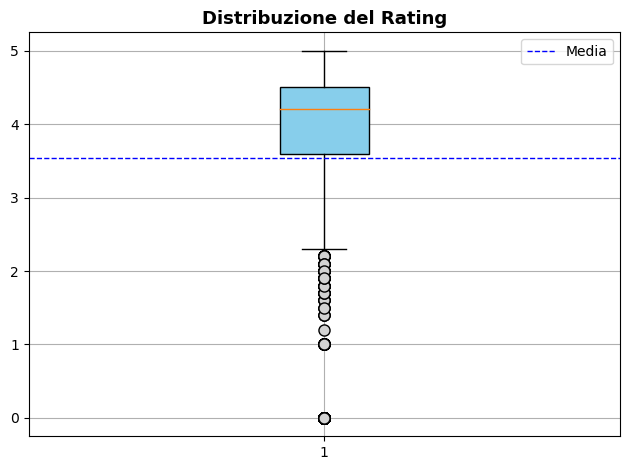

In [20]:
#Prima proviamo con il boxplot
flierprops = dict(marker = 'o', markersize = 8, markerfacecolor = 'lightgrey', markeredgecolor = 'Black')
plt.boxplot(df1['Rating'], flierprops= flierprops,patch_artist=True, boxprops={'facecolor' : 'skyblue'})

plt.axhline(media,color = 'b',linestyle = '--',linewidth = 1, label = 'Media')
plt.grid(True)
plt.title('Distribuzione del Rating', fontsize = 13, fontweight = '900', color = 'black')
plt.legend()
plt.tight_layout()
plt.show()

Ci sono degli outliers Inferiori,inoltre vediamo che la media è molto pù bassa della mediana, quindi ipotizzo che ci siano molti outlier, soprattutto sullo 0 (abbiamo visto prima che la colonna Rating aveva molti dati con Nan che abbiamo fillato con lo 0) dato che la mediana viene influenzata meno dagli outlier rispetto alla media.

Adesso proviamo a vedere con uno scatterplot se riusciamo ad approfondire la distribuzione dei dati.

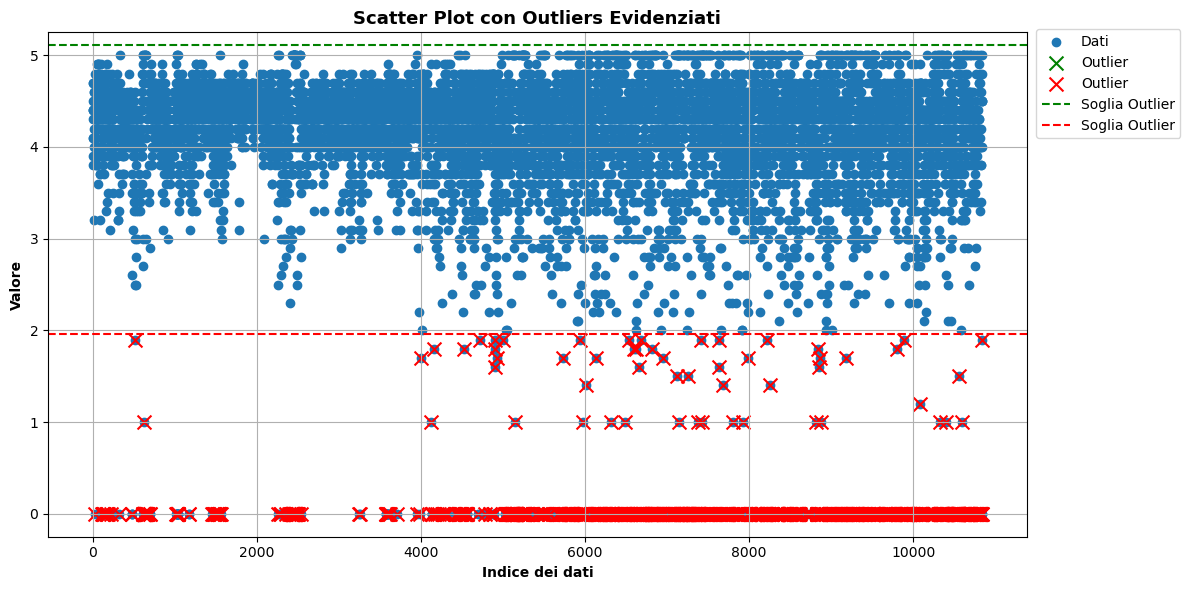

In [21]:
# Crea un grafico a dispersione dei dati
plt.figure(figsize=(12, 6))
plt.scatter(df1.index, df1['Rating'], label='Dati')  # Tutti i dati
plt.scatter(outlier_df_sup.index, outlier_df_sup['Rating'], color='green', label='Outlier', marker='x', s=100)  # Outlier evidenziati in rosso
plt.scatter(outlier_df_inf.index, outlier_df_inf['Rating'], color='red', label='Outlier', marker='x', s=100)  # Outlier evidenziati in rosso
plt.axhline(media + soglia_outlier, color='green', linestyle='--', label='Soglia Outlier')  # Linea per la soglia degli outlier
plt.axhline(media - soglia_outlier, color='red', linestyle='--', label='Soglia Outlier')  # Linea per la soglia degli outlier
plt.xlabel('Indice dei dati', fontsize = 10, fontweight = '900', color = 'black')
plt.ylabel('Valore', fontsize = 10, fontweight = '900', color = 'black')
plt.title('Scatter Plot con Outliers Evidenziati', fontsize = 13, fontweight = '900', color = 'black')
plt.legend(loc= (1.01,0.79))
plt.grid(True)
plt.tight_layout()
plt.show()

Vediamo come entrambi i grafici confermano che ci sono degli outlier inferiori (Dati minori della linea Rossa).

Sono App che hanno il Rating molto basso, possiamo ipotizzare che ci sia poco interesse verso le App. 

Approfondiamo la questione più avanti.


In [22]:
#Capiamo quante App ci sono per categoria

category_counts = df1['Category'].value_counts()
category_counts

Category
FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
ART_AND_DESIGN           64
EVENTS                   64
PARENTING                60
COMICS                   56
BEAUTY                   53
0                         1
Name: count, dtype: int64

Vediamo che le categorie "FAMILY", "GAME", "TOOLS" abbiano il numero più alto di applicazioni nel google play store. Vediamo se sono anche quelle con più interesse

Per prima cosa, scopriamo quale applicazione ha il numero più alto di reviews e il numero più alto di installazioni per incrociare i due dati e vedere quali sono le App con maggior interesse.

In [23]:
df1['Reviews']= df1['Reviews'].astype(int)

In [24]:
df1.groupby('Category')['Reviews'].sum().sort_values(ascending=False)

Category
GAME                   622298709
COMMUNICATION          285811368
TOOLS                  229356578
SOCIAL                 227927801
FAMILY                 143825488
PHOTOGRAPHY            105351270
VIDEO_PLAYERS           67484568
PRODUCTIVITY            55590649
PERSONALIZATION         53543080
SHOPPING                44551730
SPORTS                  35348813
ENTERTAINMENT           34762650
TRAVEL_AND_LOCAL        26819741
NEWS_AND_MAGAZINES      23130228
HEALTH_AND_FITNESS      21361355
MAPS_AND_NAVIGATION     17729148
BOOKS_AND_REFERENCE     16721314
EDUCATION               13364148
FINANCE                 12662106
WEATHER                 12295164
LIFESTYLE               11832671
BUSINESS                 9890245
FOOD_AND_DRINK           6325028
DATING                   3623544
COMICS                   2342071
HOUSE_AND_HOME           1929847
ART_AND_DESIGN           1419203
MEDICAL                  1182971
AUTO_AND_VEHICLES        1163666
PARENTING                 958331
L

Vediamo che GAME e TOOLS, oltre ad essere tra le categorie con più App, sono anche le categorie che hanno più recensioni. Adesso vediamo il numero di installazioni e traiamo delle conclusioni iniziali.

In [25]:
df1.groupby('Category')['Installs'].sum().sort_values(ascending=False) 

Category
PRODUCTIVITY           500,000,000+10,000,000+100,000,000+10,000,000+...
BEAUTY                 500,000+1,000,000+100,000+500,000+1,000,000+50...
WEATHER                50,000,000+1,000,000+50,000,000+10,000+10,000,...
PERSONALIZATION        50,000,000+1,000,000+100,000,000+5,000,000+100...
LIBRARIES_AND_DEMO     50,000+10,000+100,000+1,000+100,000+10,000+100...
LIFESTYLE              5,000,000+10,000,000+100,000+10,000,000+5,000,...
BOOKS_AND_REFERENCE    100,000,000+50,000+100,000+10,000,000+100,000,...
MAPS_AND_NAVIGATION    100,000,000+5,000,000+10,000,000+10,000,000+5,...
EDUCATION              100,000,000+10,000,000+100,000+5,000,000+10,00...
GAME                   100,000,000+1,000,000,000+500,000,000+10,000,0...
ENTERTAINMENT          100,000,000+1,000,000+1,000,000+10,000,000+50,...
EVENTS                 100,000+5,000,000+500,000+50,000+5,000,000+1,0...
MEDICAL                100,000+10,000+10,000+10,000+10,000+10,000+5,0...
AUTO_AND_VEHICLES      100,000+1,000,000+1

Non possiamo utitizzare questi dati grezzi, dobbiamo manipolarli per togliere il '+' e il '.'

In [26]:
df1['Installs'].unique() 

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [27]:
df1['Installs']= df1['Installs'].str.replace(',','',regex=False)
df1['Installs']= df1['Installs'].str.replace('+','',regex= False)
df1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,0.0,3,9.5M,1000,Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000,Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,10000000,Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [28]:
df1['Installs']= df1['Installs'].astype(int) 

In [29]:
df1.groupby('Category')['Installs'].sum().sort_values(ascending=False)

Category
GAME                   13878924415
COMMUNICATION          11038276251
TOOLS                   8001771915
PRODUCTIVITY            5793091369
SOCIAL                  5487867902
PHOTOGRAPHY             4649147655
FAMILY                  4427941505
VIDEO_PLAYERS           3926902720
TRAVEL_AND_LOCAL        2894887146
NEWS_AND_MAGAZINES      2369217760
ENTERTAINMENT           2113660000
BOOKS_AND_REFERENCE     1665969576
PERSONALIZATION         1532494782
SHOPPING                1400348785
HEALTH_AND_FITNESS      1144022512
SPORTS                  1096474498
BUSINESS                 697164865
LIFESTYLE                503823539
MAPS_AND_NAVIGATION      503281890
FINANCE                  455348734
WEATHER                  361100520
EDUCATION                352952000
FOOD_AND_DRINK           211798751
DATING                   140926107
ART_AND_DESIGN           114338100
HOUSE_AND_HOME            97212461
AUTO_AND_VEHICLES         53130211
LIBRARIES_AND_DEMO        52995910
COMICS     

Adesso i dati possono essere analizzati. Facciamo un df solo con le colonne d'interesse

In [30]:
Category_rev= df1.groupby('Category')[['Reviews','Installs']].sum().sort_values(ascending=False,by='Reviews').reset_index()
Category_rev

,Category,Reviews,Installs
0,GAME,622298709,13878924415
1,COMMUNICATION,285811368,11038276251
2,TOOLS,229356578,8001771915
3,SOCIAL,227927801,5487867902
4,FAMILY,143825488,4427941505
5,PHOTOGRAPHY,105351270,4649147655
6,VIDEO_PLAYERS,67484568,3926902720
7,PRODUCTIVITY,55590649,5793091369
8,PERSONALIZATION,53543080,1532494782
9,SHOPPING,44551730,1400348785


Le colonne Installs e Reviews hanno numeri molto grandi, meglio normalizzarli in previsione di plottare a grafico il risultato dell'analisi

In [31]:
Category_rev['perc_reviews'] = round((Category_rev['Reviews']/Category_rev['Reviews'].sum())*100,3)
Category_rev.head()

,Category,Reviews,Installs,perc_reviews
0,GAME,622298709,13878924415,29.746
1,COMMUNICATION,285811368,11038276251,13.662
2,TOOLS,229356578,8001771915,10.963
3,SOCIAL,227927801,5487867902,10.895
4,FAMILY,143825488,4427941505,6.875


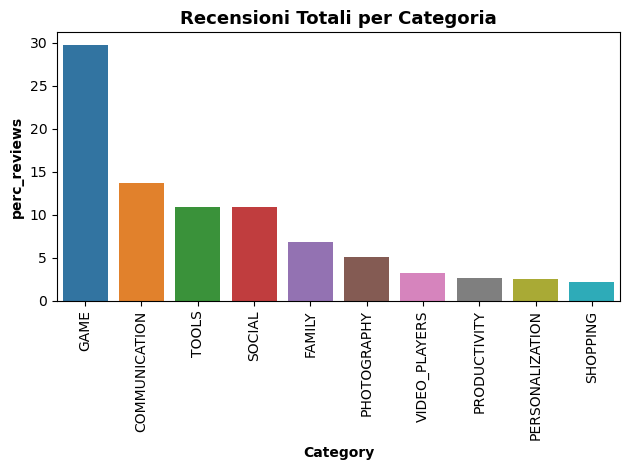

In [32]:
sns.barplot(Category_rev[0:10],x='Category',y='perc_reviews')
plt.xticks(rotation=90)
plt.xlabel("Category", fontsize = 10, fontweight = '900', color = 'black')
plt.ylabel("perc_reviews", fontsize = 10, fontweight = '900', color = 'Black')
plt.title('Recensioni Totali per Categoria',fontsize = 13, fontweight = '900', color = 'black')
plt.tight_layout()
plt.show()

Vediamo che solo la categoria "GAME" è al primo posto, "FAMILY" e "TOOLS" siano meno recensite. Adesso controlliamo le installazioni

In [33]:
Category_Insta = Category_rev.sort_values(by='Installs',ascending=False)
Category_Insta.drop(['perc_reviews'],axis=1,inplace=True)

In [34]:
Category_Insta['perc_Installs'] = round((Category_Insta['Installs']/Category_Insta['Installs'].sum())*100,3)
Category_Insta.head()

,Category,Reviews,Installs,perc_Installs
0,GAME,622298709,13878924415,18.475
1,COMMUNICATION,285811368,11038276251,14.694
2,TOOLS,229356578,8001771915,10.652
7,PRODUCTIVITY,55590649,5793091369,7.711
3,SOCIAL,227927801,5487867902,7.305


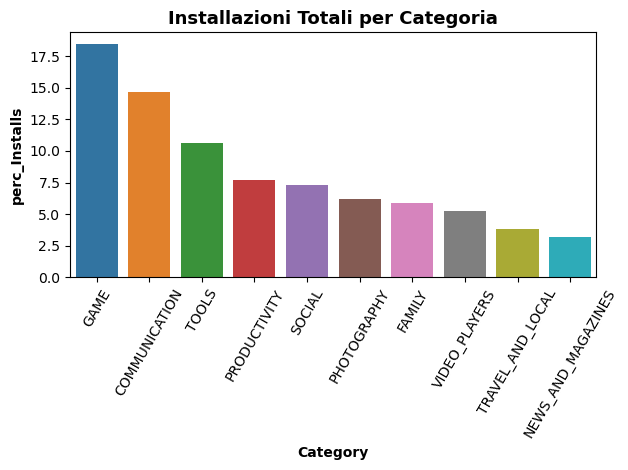

In [35]:
sns.barplot(Category_Insta[0:10],x='Category',y='perc_Installs')
plt.xticks(rotation=60)
plt.title('Installazioni Totali per Categoria', fontsize = 13, fontweight = '900', color = 'black')
plt.xlabel('Category', fontsize = 10, fontweight = '900', color = 'black')
plt.ylabel('perc_Installs', fontsize = 10, fontweight = '900', color = 'black')
plt.tight_layout()
plt.show()

Anche in questo caso vediamo che la categoria "GAME" è la più installata,"TOOLS" e "FAMILY" seguono come l'analisi precedente.

Mettiamo a confronto i grafici e traiamo le conclusioni

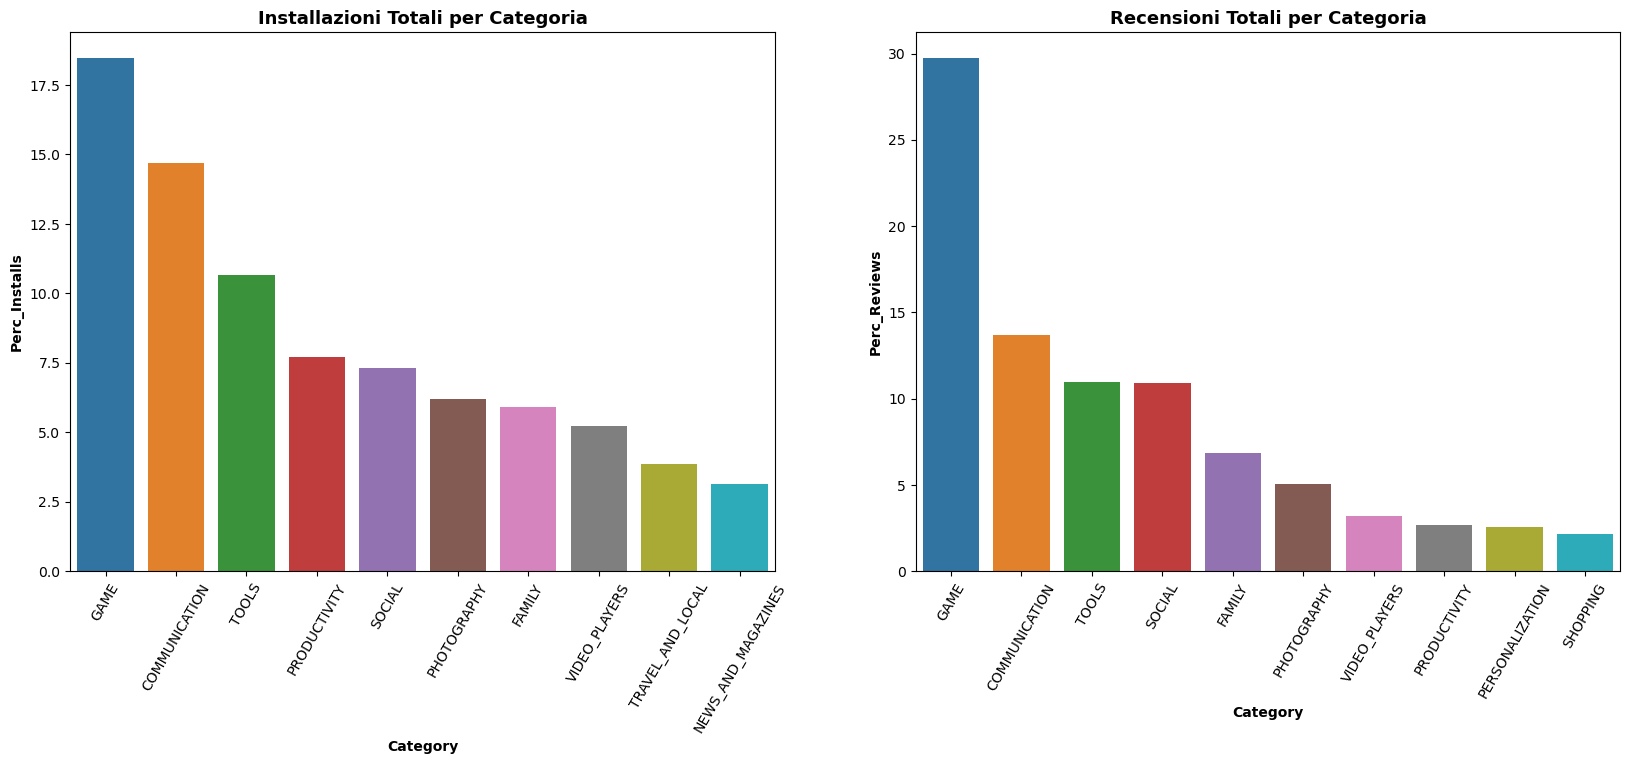

In [36]:
fig,ax = plt.subplots(1,2,figsize=(20,7))

sns.barplot(Category_Insta[0:10],x='Category',y='perc_Installs',ax=ax[0]) 
ax[0].tick_params(axis='x', rotation=60)
ax[0].set_xlabel('Category', fontsize = 10, fontweight = '900', color = 'black')
ax[0].set_ylabel('Perc_Installs', fontsize = 10, fontweight = '900')
ax[0].set_title('Installazioni Totali per Categoria', fontsize = 13,fontweight = '900', color = 'black')

sns.barplot(Category_rev[0:10],x='Category',y='perc_reviews',ax=ax[1]) 
ax[1].tick_params(axis='x', rotation=60)
ax[1].set_xlabel('Category', fontsize = 10, fontweight = '900', color = 'black')
ax[1].set_ylabel('Perc_Reviews', fontsize = 10, fontweight = '900', color = 'black')
ax[1].set_title('Recensioni Totali per Categoria', fontsize = 13, fontweight = '900', color = 'black')

plt.show() 

Con questo grafico possiamo dedurre che la categoria "GAME" è la categoria con più interesse da parte del mercato di tutto il dataset per Numero di Applicazioni, la più recensita e la più installata. 
Inoltre possiamo aggiungere che la categoria "TOOLS" è la terza per interesse.
Infine vediamo che la categoria "Family", che è la categoria con maggior numero di Applicazioni, non si trova nemmeno nella Top 3 delle App più recensite e nemmeno con quelle che hanno più reviews.

Come prima conclusione possiamo dire che la categoria "Game" è quella con maggior interesse, ma anche quella con maggior concorrenza perchè spicca sia con il numero di Installazioni sia con il numero di Reviews quindi deduco che gli utenti apprezzino molto le App di questa categorie, di conseguenza immagino che le App siano ben strutturate,curate su tanti dettagli quindi mi immagino anche molta concorrenza in questo settore.

Controlliamo la distribuzione per le colonne "Installs" e "Reviews" in base alla colonna "Rating"

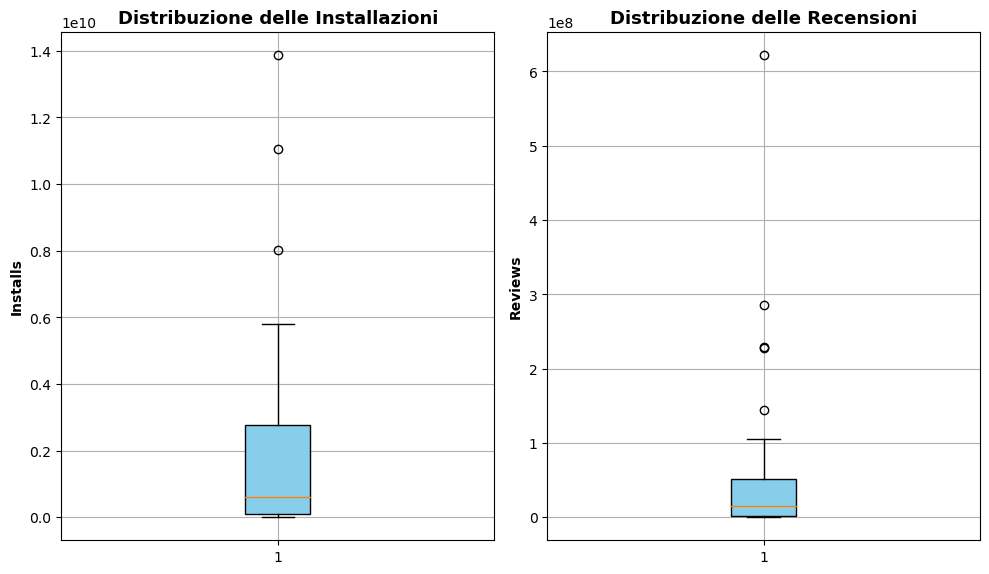

In [37]:
fig,ax = plt.subplots(1,2, figsize=(10,6))
ax[0].boxplot(Category_Insta['Installs'],vert=True, patch_artist=True,boxprops = {'facecolor' : 'skyblue'})
ax[0].set_ylabel('Installs', fontsize = 10, fontweight = '550', color ='black')
ax[0].grid(True)
ax[0].set_title('Distribuzione delle Installazioni', fontsize = 13, fontweight = '900', color = 'black')
ax[1].boxplot(Category_rev['Reviews'],vert= True, patch_artist=True, boxprops= {'facecolor' : 'skyblue'})
ax[1].set_ylabel('Reviews', fontsize = 10, fontweight = '550', color = 'black')
ax[1].grid(True)
ax[1].set_title('Distribuzione delle Recensioni', fontsize = 13, fontweight = '550', color = 'black')
plt.tight_layout()
plt.show()

Vediamo come la distribuzione delle due colonne abbiamo pochi otliers e vedendo la scala delle y, possiamo dedurre che l'outliers massimo fa riferimento alla categoria "GAME", a conferma di quanto detto precedentemente.

Adesso approfondiamo la questione di tutte quelle applicazioni che avevano il "RATING" con il valore nullo, successivamente sostituito dallo '0'.

In [38]:
Rating_0 = df1[df1['Rating']==0]

Vediamo il dataset filtrato

In [39]:
Rating_0

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,0.0,61,7.0M,100000,Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,0.0,182,5.7M,100000,Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,0.0,119,3.7M,50000,Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,0.0,654,7.4M,100000,Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,0.0,77,2.9M,10000,Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,0.0,67,82M,10000,Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,0.0,7,7.7M,100,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,0.0,38,9.8M,5000,Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,0.0,0,9.6M,10,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


La prima cosa che salta all' occhio è che ci sono 1463 App con Rating=0, è un numero piuttsoto alto considerando la grandezza del campione preso in esame (9660, quindi parliamo poco più del 15% del totale)Adesso analizziamo come sono adate le App a livello di Installazioni e di Reviews per proporre delle ipotesi 

Quindi creiamo due df riordinati uno per i valori di "Installs" e uno per i valori di "Reviews"

In [40]:
Install_Rating_0 = Rating_0['Installs'].value_counts().reset_index()
Install_Rating_0

,Installs,count
0,100,407
1,10,316
2,1000,191
3,50,148
4,500,129
5,5,73
6,1,64
7,10000,44
8,5000,43
9,100000,18


In [41]:
Install_Rating_0.rename(columns={'count': 'Count'},inplace=True)

In [42]:
Install_Rating_0 

,Installs,Count
0,100,407
1,10,316
2,1000,191
3,50,148
4,500,129
5,5,73
6,1,64
7,10000,44
8,5000,43
9,100000,18


In [43]:
Install_Rating_0.sort_values(by = 'Installs',inplace=True,ascending=False) 

In [44]:
# Abbiamo contato e ordinato le installazioni delle App per numero di Installazioni 
Install_Rating_0

,Installs,Count
12,1000000,2
13,500000,1
9,100000,18
11,50000,12
7,10000,44
8,5000,43
2,1000,191
4,500,129
0,100,407
3,50,148


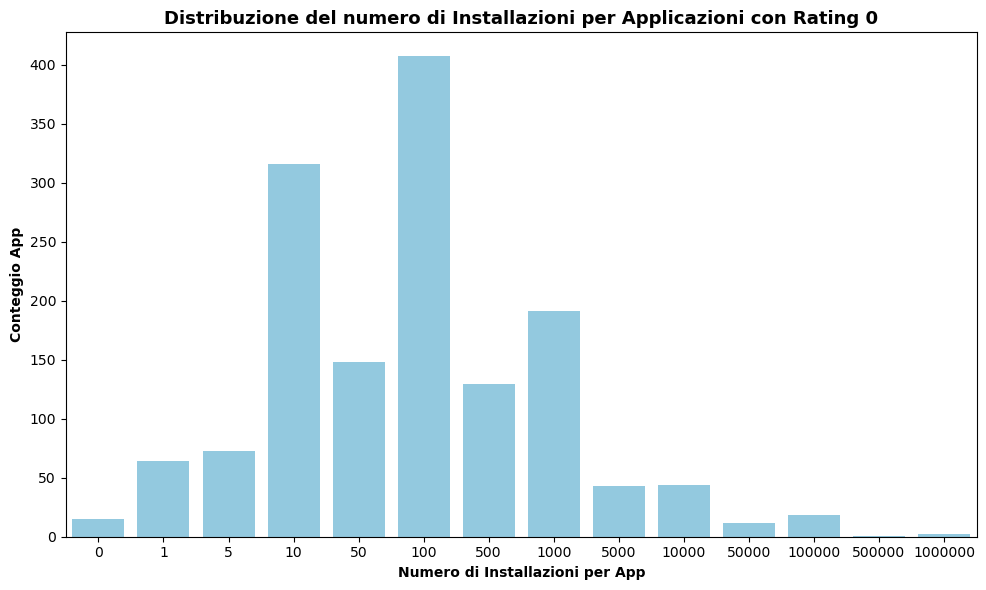

In [45]:
plt.figure(figsize=(10,6))
sns.barplot(Install_Rating_0,x='Installs',y='Count', color= 'skyblue')
plt.xlabel('Numero di Installazioni per App', fontsize = 10, fontweight = '900', color = 'black')
plt.ylabel('Conteggio App', fontsize = 10, fontweight = '900', color = 'black')
plt.title('Distribuzione del numero di Installazioni per Applicazioni con Rating 0', fontsize = 13, fontweight = '900')
plt.tight_layout()
plt.show()

Dalla lettura della distribuzione possiamo vedere come ci siano tantissime App con Rating 0 che hanno pochissime Installazioni, per esempio vediamo come poco più di 400 app hanno 100 installazioni e pochissime app hanno più di 100000 Installazioni

Adesso facciamo la stessa procedura per le Reviews

In [46]:
Reviews_Rating_0 = Rating_0['Reviews'].value_counts().reset_index()

In [47]:
Reviews_Rating_0.rename(columns = {'count' : 'Count'},inplace=True)

In [48]:
Reviews_Rating_0.sort_values(by= 'Reviews',inplace=True,ascending=True)

In [49]:
Reviews_Rating_0

,Reviews,Count
0,0,593
1,1,205
2,2,131
3,3,94
4,4,63
...,...,...
68,1317,1
72,1330,1
77,2221,1
67,2536,1


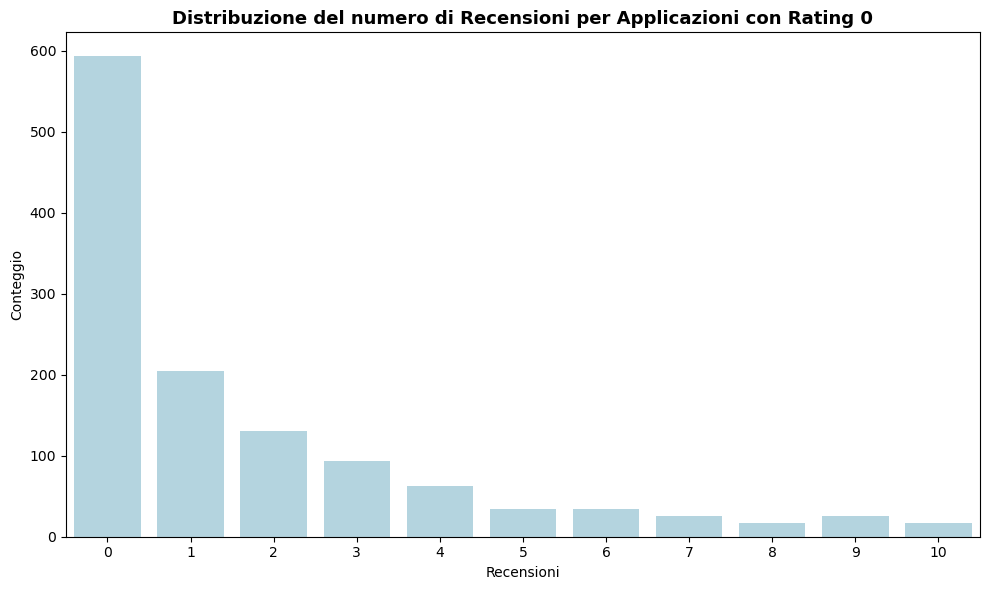

In [50]:
plt.figure(figsize=(10,6))
sns.barplot(Reviews_Rating_0[0:11], x= 'Reviews', y= 'Count',color = 'lightblue')
plt.xlabel('Recensioni')
plt.ylabel('Conteggio')
plt.title('Distribuzione del numero di Recensioni per Applicazioni con Rating 0', fontsize = 13, fontweight = '900')
plt.tight_layout()

Vediamo che poco meno di 600 applicazioni hanno 0 recensioni su un campione di poco più di 1460 applicazioni

Questo indica che quasi la metà delle App prese in esame ha 0 recensioni, quindi se pensiamo anche all'andamento delle Installazioni, possiamo dire che, per ora, le App non sono conosciute dagli utenti.

Come ultima cosa, analizziamo il comportamento delle "Installazioni" e le "Reviews" nel tempo, questo ci aiuta a capire se ci sono delle anomalie nell'analisi.

In [51]:
Rev_timeserie_R_0 = copy.deepcopy(Rating_0)

Rev_timeserie_R_0['Last Updated'] = pd.to_datetime(Rev_timeserie_R_0['Last Updated'], format= '%B %d, %Y')
Rev_timeserie_R_0.set_index('Last Updated',inplace=True)

In [52]:
mediaRevMonth_R_0 = Rev_timeserie_R_0.resample('Q').mean(numeric_only=True)/1000

Plottiamo tutto a grafico e traiamo le nostre conclusioni sull'ipotesi di spiegare perchè ci fossero così tante app con Rating 0 

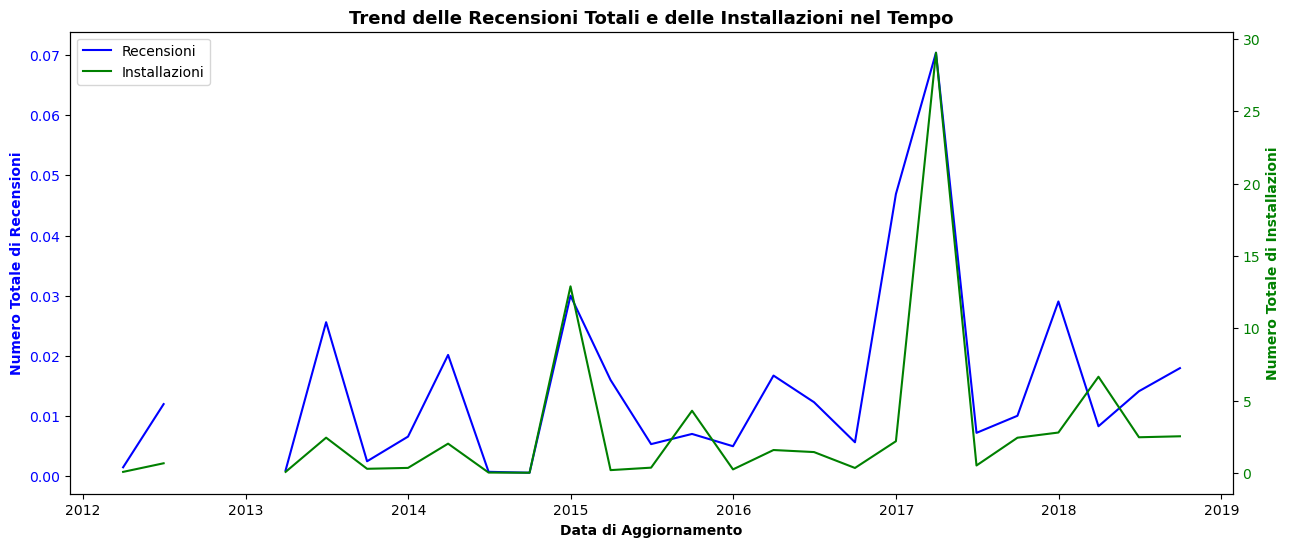

In [53]:

fig, ax1 = plt.subplots(figsize=(15, 6))
ax2 = ax1.twinx()

# Plot dei dati sul primo set di assi y
ax1.plot(mediaRevMonth_R_0.index, mediaRevMonth_R_0['Reviews'], color='b', label='Recensioni')
ax1.set_xlabel('Data di Aggiornamento', fontsize = 10, fontweight = '900')
ax1.set_ylabel('Numero Totale di Recensioni', fontsize = 10, fontweight = '900', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Plot dei dati sul secondo set di assi y
ax2.plot(mediaRevMonth_R_0.index, mediaRevMonth_R_0['Installs'], color='g', label='Installazioni')
ax2.set_ylabel('Numero Totale di Installazioni', fontsize = 10, fontweight = '900', color='g')
ax2.tick_params(axis='y', labelcolor='g')

plt.title('Trend delle Recensioni Totali e delle Installazioni nel Tempo', fontsize = 13, fontweight = '900')
plt.xticks(rotation=45)

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

# Mostra il grafico
plt.show()


Vediamo che le linee sono leggermente simili,non abbiamo un vero e proprio trend ma abbiamo un andamento molto altalenante quindi  per essere sicuri controlliamo la correlazione tra le colonne "Installs" e "Reviews"


In [54]:
datacorr_R0 = Rev_timeserie_R_0['Installs'].corr(Rev_timeserie_R_0['Reviews'])
print("Correlazione tra Numero totale di installazioni e Numero totale di Installazioni:",datacorr_R0) 

Correlazione tra Numero totale di installazioni e Numero totale di Installazioni: 0.2926419036684776


La correlazione non è molto forte quindi ogni ipotesi è da prendere tenendo in considerazione di questa cosa e nessuna delle due variabili si discosta particolarmente dall'altra( come abbiamo visto con il grafico) per cui traiamo le nostre conclusioni.
- In questo caso,la maggior parte delle App non è conosciuta degli Utenti, probabilmente per una strategia di marketing sbagliata oppure non sono state apprezzate dal segmento di mercato a cui si riferiscono, anche se quest'ultima è  meno probabile.


Abbiamo finito la nostra prima analisi, per cui possiamo tornare ad analizzare il DF principale e continuare con l'analisi del dataset.

Adesso facciamo un'analisi temporale riguardo al numero di installazioni e recensioni del DF principale 

In [55]:
df1['Rating']=df1['Rating'].mask(df1['Rating'] == 0, df1['Rating'].mean())

In [56]:
Rev_time_serie = copy.deepcopy(df1)

Rev_time_serie['Last Updated'] = pd.to_datetime(Rev_time_serie['Last Updated'], format= '%B %d, %Y')
Rev_time_serie.set_index('Last Updated',inplace=True)

In [57]:
mediaRevMonth = Rev_time_serie.resample('Q').mean(numeric_only=True)/1000
mediaRevMonth


,Rating,Reviews,Installs
Last Updated,,,
2010-06-30,0.0042,1.415000,100.000000
2010-09-30,<NA>,NaN,NaN
2010-12-31,<NA>,NaN,NaN
2011-03-31,0.0041,0.594000,75.000000
2011-06-30,0.004014,6.775286,872.300000
2011-09-30,0.003967,13.831000,2016.666667
2011-12-31,0.003767,48.564000,1700.333333
2012-03-31,0.003664,21.365167,1678.358333
2012-06-30,0.00342,0.669000,33.676667


Partiamo con le "reviews"

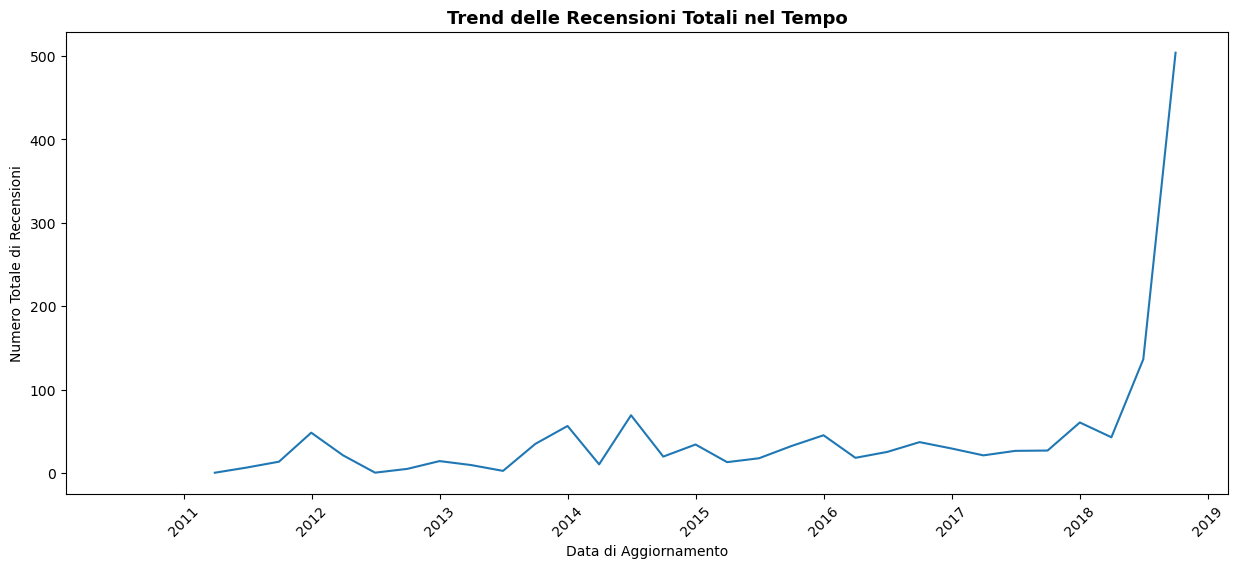

In [58]:
# Analisi del trend delle recensioni totali nel tempo
plt.figure(figsize=(15, 6))
plt.plot(mediaRevMonth.index,mediaRevMonth['Reviews'])
plt.title('Trend delle Recensioni Totali nel Tempo', fontsize = 13, fontweight = '900')
plt.xlabel('Data di Aggiornamento', fontsize = 10)
plt.ylabel('Numero Totale di Recensioni', fontsize = 10)
plt.xticks(rotation=45)
plt.show()


Adesso le Installazioni

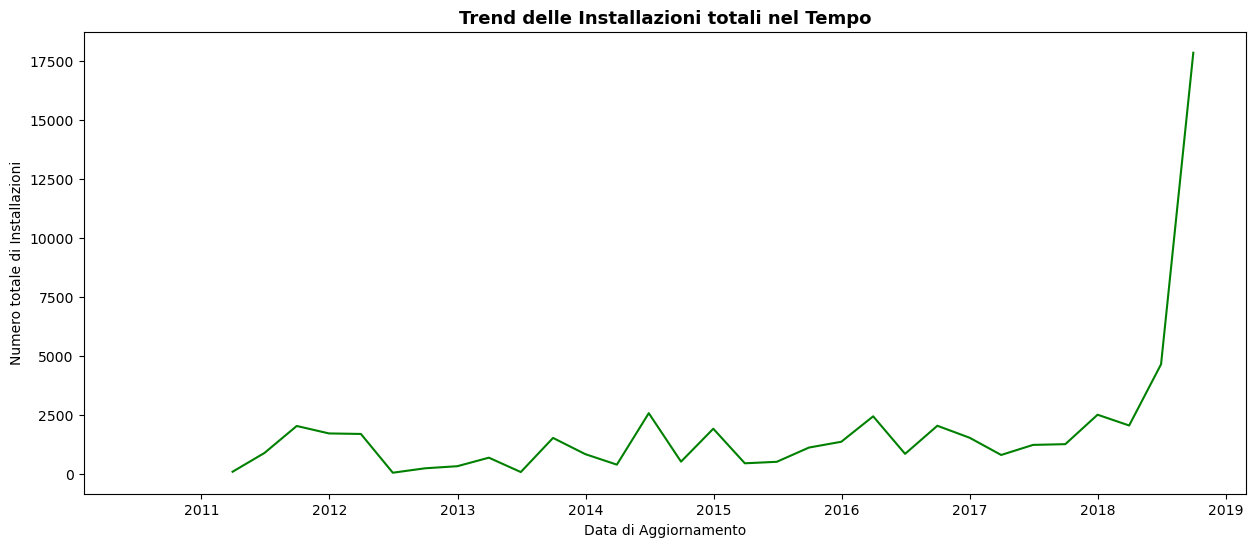

In [59]:
plt.figure(figsize=(15,6))
plt.plot(mediaRevMonth.index,mediaRevMonth['Installs'], color = 'g')
plt.xlabel('Data di Aggiornamento', fontsize = 10)
plt.ylabel('Numero totale di Installazioni',fontsize = 10)
plt.title('Trend delle Installazioni totali nel Tempo', fontsize = 13, fontweight = '900')
plt.show()

Li confrontiamo in un solo grafico come abbiamo precedentemente fatto per le app con Rating 0

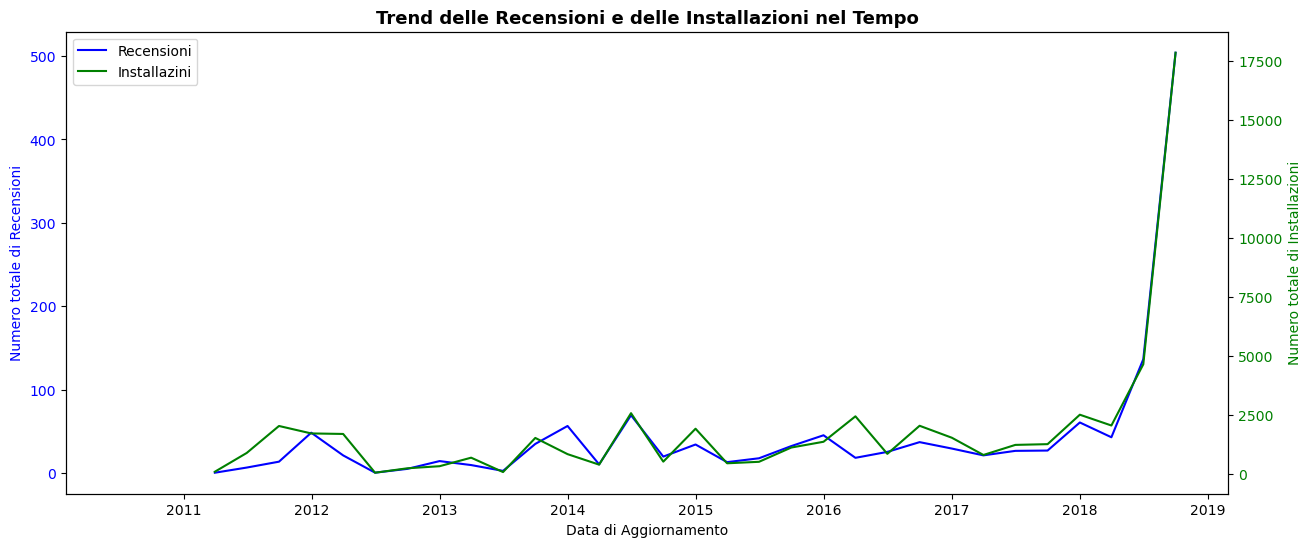

In [60]:
fig, ax1 = plt.subplots(figsize=(15,6))
ax2 = ax1.twinx()

ax1.plot(mediaRevMonth.index,mediaRevMonth['Reviews'], color = 'b', label = 'Recensioni')
ax1.set_xlabel('Data di Aggiornamento')
ax1.set_ylabel('Numero totale di Recensioni',fontsize = 10, color = 'b')
ax1.tick_params(axis='y', labelcolor = 'b')

ax2.plot(mediaRevMonth.index,mediaRevMonth['Installs'], color = 'g', label = 'Installazini')
ax2.set_ylabel('Numero totale di Installazioni',fontsize = 10, color = 'g')
ax2.tick_params(axis='y', labelcolor = 'g')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')
plt.title('Trend delle Recensioni e delle Installazioni nel Tempo', fontsize = 13, fontweight = '900')

plt.show()

Considerazioni: Abbiamo visto che nel 2011 non ci siano state molte installazioni e recensioni, ma dobbiamo considerare che stavano uscendo i primi smatphone e l'utenza era molto ristretta. Con il progresso tecnologico e l'avvento di nuove tecnologie è stato possibile allargare il bacino di utenza, dato che sempre più persone usavano lo smartphone quotidianamente; Infatti il grafico conferma come con il passare del tempo, ci siano sempre più installazioni e recensioni con un ritmo piuttosto simile, fino ad arrivare al 2019 con un'esplosione di queste due.

Adesso andiamo avanti, continuiamo cercando correlazioni tra variabili del dataset principale e vediamo se esistono dati correlati che posso aiutarci a capire come vengono percepite le applicazione dalle persone 

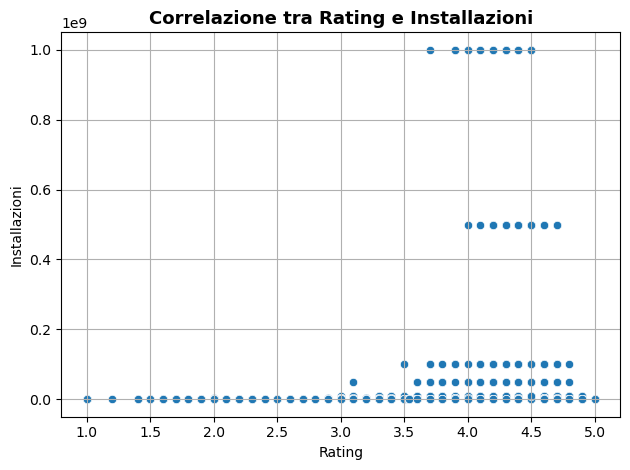

In [61]:
sns.scatterplot(x='Rating', y='Installs',data=df1)
plt.xlabel('Rating')
plt.ylabel('Installazioni')
plt.title('Correlazione tra Rating e Installazioni', fontsize = 13, fontweight = '900')
plt.grid()
plt.tight_layout()
plt.show()

Notiamo che non sono chiarissi questi dati presi singolarmente

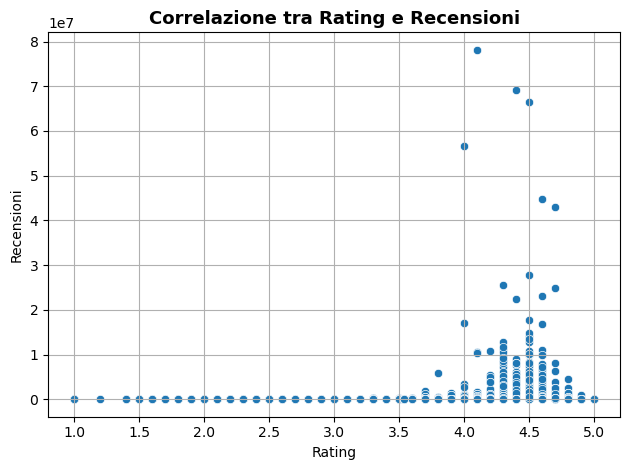

In [62]:
sns.scatterplot(x='Rating',y='Reviews', data = df1)
plt.xlabel('Rating')
plt.ylabel('Recensioni')
plt.title('Correlazione tra Rating e Recensioni', fontsize = 13,fontweight ='900')
plt.grid(True)
plt.tight_layout()
plt.show()

Anche questo grafico non ci dice molto

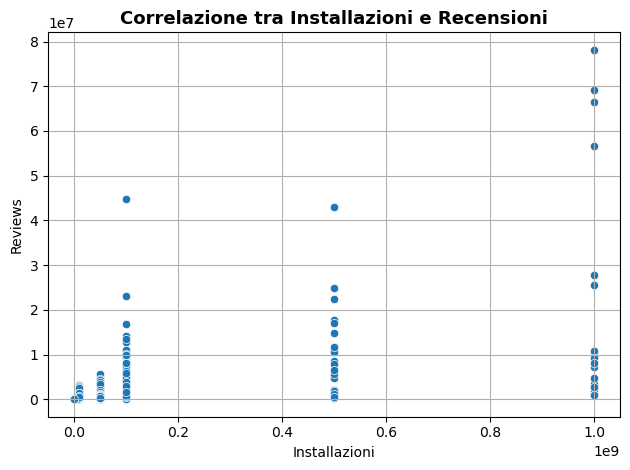

In [63]:
sns.scatterplot(x='Installs',y='Reviews', data=df1)
plt.xlabel('Installazioni')
plt.ylabel('Reviews')
plt.title('Correlazione tra Installazioni e Recensioni',fontsize = 13, fontweight = '900')
plt.grid(True)
plt.tight_layout()
plt.show()

Vediamo che non sembrano esserci grosse correlazioni tra i vari dati, tranne che per l'ultimo grafico. Andiamo a vedere se è vero costruendo una HeatMap

In [64]:
df_corr = df1[['Rating', 'Installs', 'Reviews']].corr()

Visualizzaimo il risultato con la Heatmap

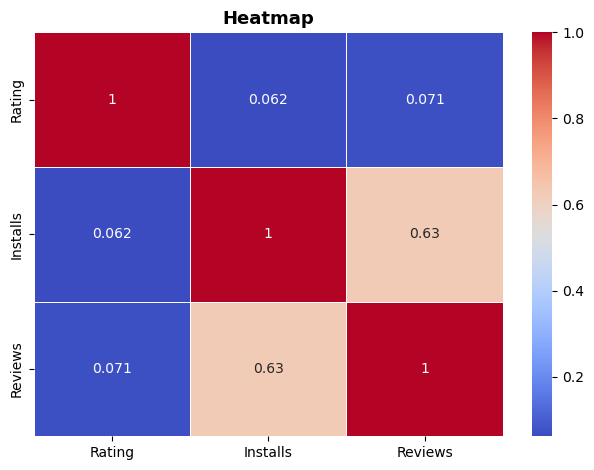

In [65]:
sns.heatmap(df_corr, annot=True, cmap='coolwarm', linewidths= 0.50)
plt.title('Heatmap', fontsize = 13, fontweight = '900')

plt.tight_layout()
plt.show()

Effettivamente vediamo come l'ipotesi precendete sia confermata. Esiste una relazione abbastanza forte tra il numero di installazioni e il numero di recensioni che riceve un'App.
Approfondiamo la correlazione con una regressione lineare

In [66]:
from sklearn import datasets,linear_model,model_selection
from sklearn.metrics import r2_score

In [67]:
Reviews_test = copy.deepcopy(df1['Reviews'])
Reviews_test

0           159
1           967
2         87510
3        215644
4           967
          ...  
10837         4
10838         3
10839       114
10840    398307
10841        19
Name: Reviews, Length: 9660, dtype: int64

In [68]:
Installs_test = copy.deepcopy(df1['Installs'])
Installs_test

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10837         100
10838        1000
10839        1000
10840    10000000
10841        1000
Name: Installs, Length: 9660, dtype: int64

Prepariamo le variabili da usare per costruire il modello

In [69]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(Installs_test,Reviews_test, test_size=0.80,random_state=0) 

In [70]:
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

In [71]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [72]:
pred = model.predict(X_test)

Adesso che abbiamo preparato il modello, visualizziamo il risultato con un grafico

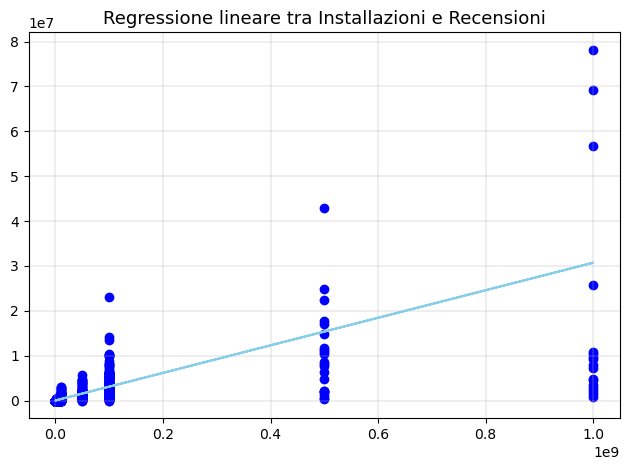

In [73]:
plt.scatter( X_test,y_test, color = 'Blue')
plt.plot(X_test ,pred ,color='skyblue' ) #training line
plt.title('Regressione lineare tra Installazioni e Recensioni', fontsize = 13)
plt.grid(True, linewidth = 0.3)
plt.tight_layout()
plt.show()

Il risultato ottenuto ha un senso logico, in quanto ci dice che in linea teorica, la App con molte Installazioni hanno anche molte recensioni.

In [74]:
score = model.score(X_train,y_train)
print('Model determination:',score)

Model determination: 0.42709629244537195


Il fattore di determinazione del modello ci dice che il modello non è molto affidabile dato che non arriva nemmeno al 0.5, ma è buon inizio

Infine cerchiamo di capire se possiamo classificare alcui gruppi di App in piccoli gruppi con comportamenti simili

In [75]:
from sklearn.cluster import KMeans

In [76]:
df1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,3.540973,3,9.5M,1000,Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000,Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,10000000,Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [77]:
dfcluster = copy.deepcopy(df1)
dfcluster

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,3.540973,3,9.5M,1000,Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000,Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,10000000,Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


Prepariamo il modello e le variabili

In [78]:
kmeans = KMeans(n_clusters= 4, random_state=0)
dfcluster['cluster'] = kmeans.fit_predict(dfcluster[['Installs','Reviews']])

centroids = kmeans.cluster_centers_

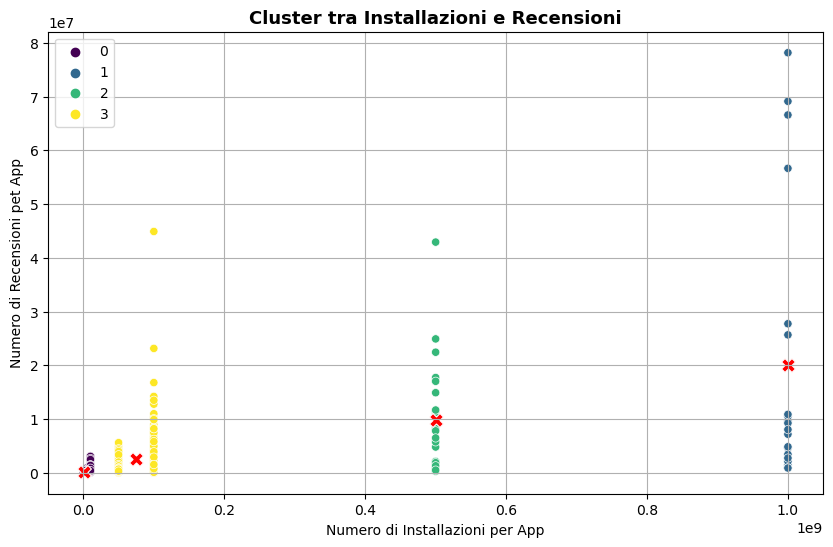

In [79]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Installs',y= 'Reviews' , data=dfcluster,hue='cluster',palette = 'viridis')
sns.scatterplot(x= centroids[:,0],y=centroids[:,1],marker = 'X', s=100, color ='red')
plt.title("Cluster tra Installazioni e Recensioni", fontsize = 13, fontweight = '900')
plt.xlabel('Numero di Installazioni per App')
plt.ylabel('Numero di Recensioni pet App')
plt.grid(True)
plt.show()

Vediamo come la differenza di scala sugli assi sia notevole e  di conseguenza il modello visualizzato potrebbe essere sbagliato

Risolviamo subito e ricariachiamo il modello.

Scriviamo uno script per ricalibrare entrambi gli assi 

In [80]:
df_scale = dfcluster.loc[:,['Installs','Reviews']]
df_scale

,Installs,Reviews
0,10000,159
1,500000,967
2,5000000,87510
3,50000000,215644
4,100000,967
...,...,...
10837,100,4
10838,1000,3
10839,1000,114
10840,10000000,398307


In [81]:
df_Scaler = copy.deepcopy(df_scale)
df_Scaler

,Installs,Reviews
0,10000,159
1,500000,967
2,5000000,87510
3,50000000,215644
4,100000,967
...,...,...
10837,100,4
10838,1000,3
10839,1000,114
10840,10000000,398307


Adesso abbiamo un df su cui far lavorare il modello, ma prima scaliamo gli assi 

In [82]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
Y_array = df_Scaler['Reviews'].to_numpy().reshape(-1,1)
Y_scaler = scaler.fit_transform(Y_array)
df_Scaler['Reviews']= Y_scaler
print(df_Scaler)

       Installs       Reviews
0         10000  2.034333e-06
1        500000  1.237233e-05
2       5000000  1.119651e-03
3      50000000  2.759067e-03
4        100000  1.237233e-05
...         ...           ...
10837       100  5.117818e-08
10838      1000  3.838364e-08
10839      1000  1.458578e-06
10840  10000000  5.096157e-03
10841      1000  2.430964e-07

[9660 rows x 2 columns]


In [83]:
X_array = df_Scaler['Installs'].to_numpy().reshape(-1,1)
X_scaler = scaler.fit_transform(X_array)
df_Scaler['Installs'] = X_scaler

Rifacciamo il modello sui "nuovi" dati

In [84]:
kmeans = KMeans(n_clusters=4, random_state=0)

cluster = kmeans.fit_predict(df_Scaler[['Installs', 'Reviews']])
df_Scaler['cluster'] = cluster

centroids_2= kmeans.cluster_centers_

df_Scaler

,Installs,Reviews,cluster
0,1.000000e-05,2.034333e-06,0
1,5.000000e-04,1.237233e-05,0
2,5.000000e-03,1.119651e-03,0
3,5.000000e-02,2.759067e-03,3
4,1.000000e-04,1.237233e-05,0
...,...,...,...
10837,1.000000e-07,5.117818e-08,0
10838,1.000000e-06,3.838364e-08,0
10839,1.000000e-06,1.458578e-06,0
10840,1.000000e-02,5.096157e-03,0


Visualizzaimo i dati Cluster finali e segnamo i centroidi presi in considerazione dal modello di apprendimento con il carattere 'X'

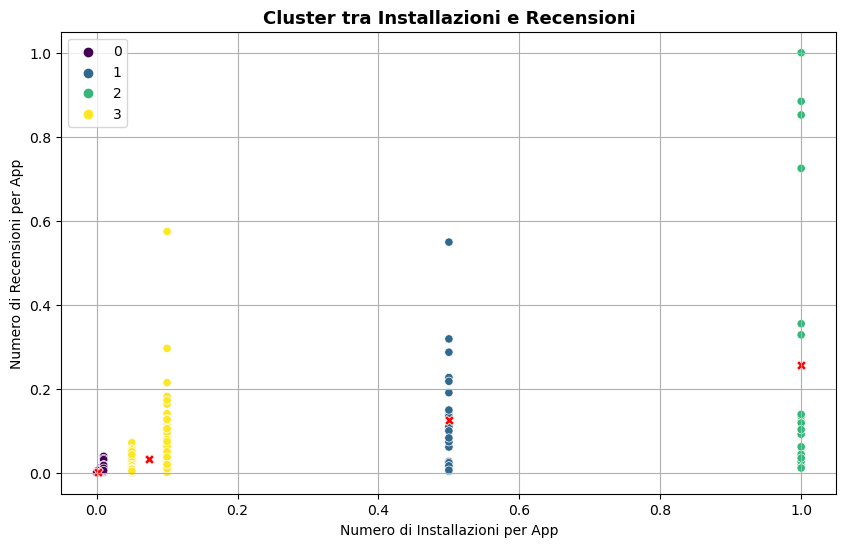

In [85]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Installs',y='Reviews',data=df_Scaler,hue='cluster',palette = 'viridis')
sns.scatterplot(x= centroids_2[:,0],y=centroids_2[:,1],marker = 'X', s=50, color ='red') 
plt.title("Cluster tra Installazioni e Recensioni", fontsize = 13, fontweight = '900')
plt.xlabel('Numero di Installazioni per App')
plt.ylabel('Numero di Recensioni per App')
plt.grid(True)
plt.show()


Notiamo come non sia cambiato nulla, in ogni caso adesso possiamo fare delle ipotesi su un modello più attendibile.

Per esempio vediamo che le App seguono una tendenza, chi ha più installazioni, di solito ha anche pìù reviews, di conseguenza un' App con queste caratteristiche è molto apprezzata dal pubblico.

Adessio analizziamo  il dataset delle reviews

In [86]:
df2

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


Il dataset è grande, vediamo com'è composto

In [87]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


Vediamo che ci sono molti numeri nulli, poco meno della metà. In più abbiamo 2 colonne numeriche 

In [88]:
df2.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


Dai valori massimi e dai valori minimi si vede come i numeri rappresentano il sentiment delle app, come una valutazione della stessa App

Prima di fare l'analisi, cerchiamo i valori Nan e fixiamoli

In [89]:
pd.isnull(df2).sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

Molte App non hanno altri dati oltre al nome, per cui conviene droppare le righe che rispettano questa condizione

In [90]:
df2_clean=copy.deepcopy(df2.dropna())


In [91]:
df2_clean

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000
64227,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000


Adesso che abbiamo il dataset, pulito facciamo una rapida esplorazione dei possibili dati che abbiamo

Partiamo con la distribuzione delle due variabili numeriche usando un grafico a barre

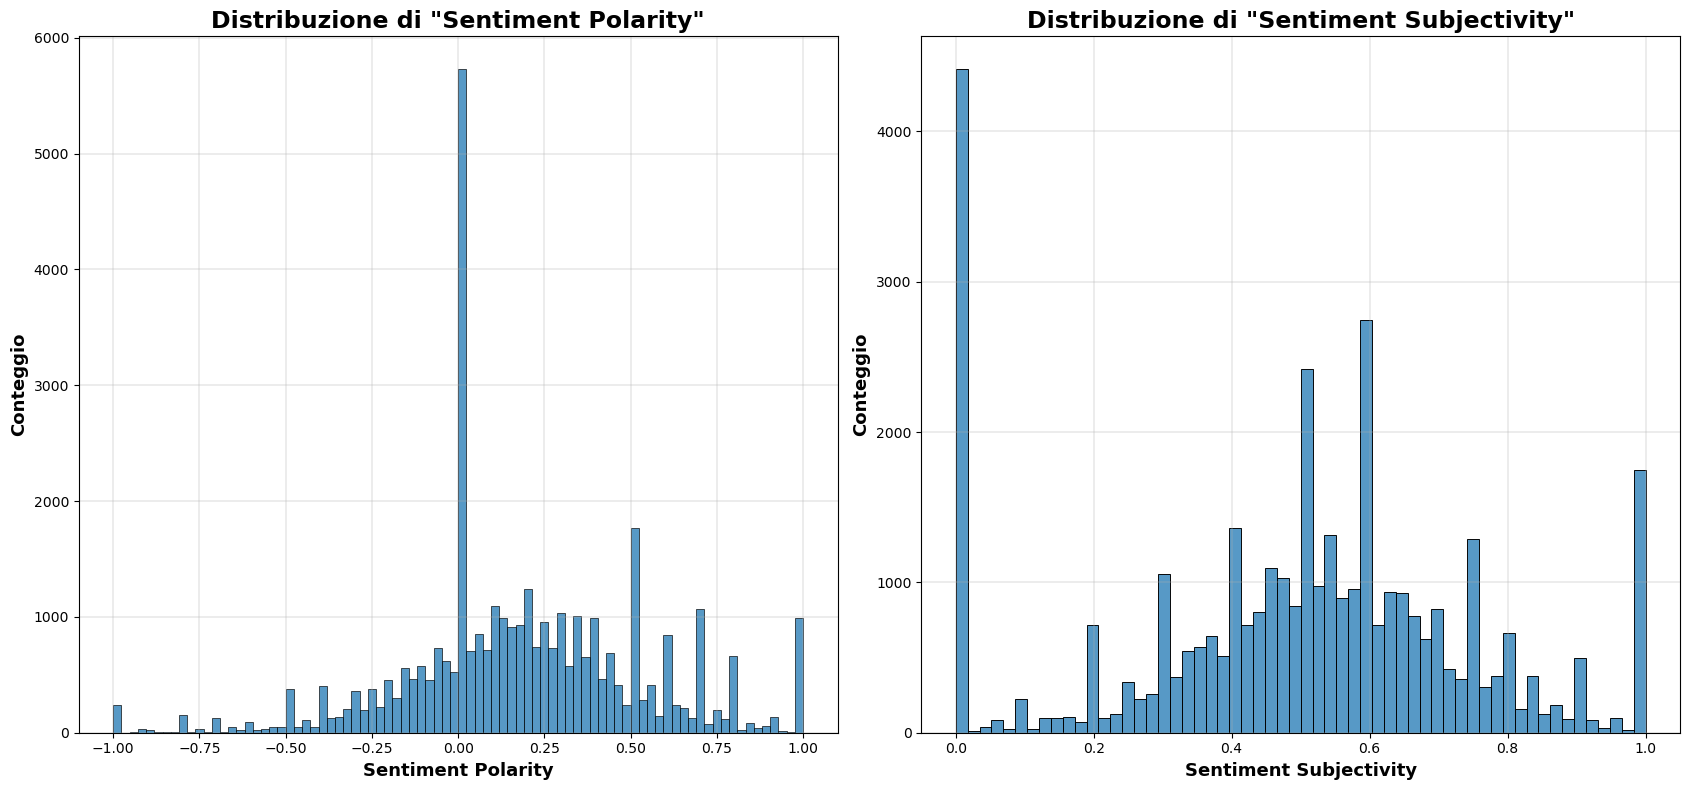

In [92]:
fig, ax = plt.subplots(1,2, figsize=(17,8))

sns.histplot(data=df2_clean,x='Sentiment_Polarity',ax=ax[0])
ax[0].set_xlabel('Sentiment Polarity', fontsize = 13,fontweight = '900',color = 'black' )
ax[0].set_ylabel('Conteggio', fontsize = 13, fontweight = '900', color = 'black')
ax[0].grid(True, linewidth = 0.33)
ax[0].set_title('Distribuzione di "Sentiment Polarity"', fontsize = 17, fontweight = '900', color = 'black')


sns.histplot(data=df2_clean,x='Sentiment_Subjectivity',ax=ax[1])
ax[1].set_xlabel('Sentiment Subjectivity',fontsize = 13, fontweight = '900', color = 'black')
ax[1].set_ylabel('Conteggio',fontsize = 13, fontweight = '900', color = 'black')
ax[1].grid(True, linewidth = 0.33)
ax[1].set_title('Distribuzione di "Sentiment Subjectivity"',fontsize = 17, fontweight = '900', color = 'black')

plt.tight_layout()
plt.show()

Possiamo notare come ci sia un numero elevato di "Sentiment Polarity"= 0, probabilmente deriva dal fatto che i dati di questo grafico facciano riferimento alla colonna Sentiment del df che ha solo 3 dati possibili: "Positive", "Negative" e "Neutral", dove Neutral =0, Positive > 0 e Negative <0. Controlleremo più avanti questa cosa.
Come ultima considerazione possiamo dedurre che è possibile che la distribuzione sia asimmetrica positiva

Invece per il secondo (Sentiment Subjectivity) ha un picco sul X = 0, ma la distribuzione è simmetrica

Controlliamo entrambi i dati con il boxplot per confermare l'ipotesi precedente e vedere se ci sono outliers.

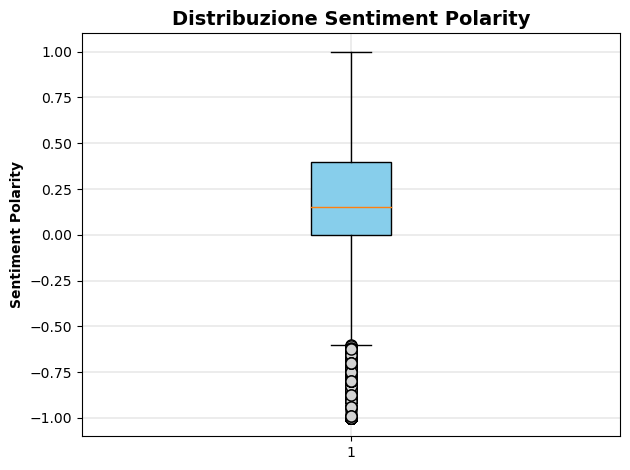

In [93]:
flierprops = dict(marker = 'o', markersize = 8, markerfacecolor = 'lightgrey', markeredgecolor = 'Black')

plt.boxplot(x=df2_clean['Sentiment_Polarity'],flierprops= flierprops, patch_artist=True, boxprops={'facecolor' : 'skyblue'})
plt.ylabel('Sentiment Polarity', fontsize = 10, fontweight = '900', color = 'black')
plt.title('Distribuzione Sentiment Polarity', fontsize = 14, fontweight = '900', color = 'black')
plt.grid(linewidth = 0.33)
plt.tight_layout()
plt.show()

Vediamo come ci siano degli outlier con Polarita Negativa questo significa che ci sono delle App che non sono state apprezzate dall'utenza. Essendo outliers possiamo anche dedurre che sono in minoranza rispetto al totale dei dati presi in esame, altrimenti il boxplot sarebbe senza outliers.
Infatti come abbiamo visto con il grafico a barre, la maggior parte dei dati è spostata verso dx(distribuzione asimmetrica positiva),il boxplot conferma quanto detto dal grafico a barre aggiungendo che nella coda a sx del grafico a barre ci siano outliers.

Come considerazione penso che, visti i risultati dati dai grafici, la maggior parte delle App è apprezzata dagli utenti e gli outliers indicano quelle App che non sono state apprezzate dagli utenti in quanto le reviews hanno feedback negativo (Polarity< 0)

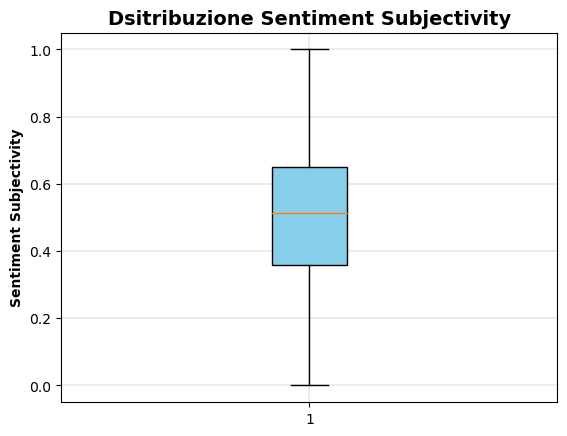

In [94]:
flierprops = dict(marker = 'o', markersize = 8, markerfacecolor = 'lightgrey', markeredgecolor = 'Black')

plt.boxplot(x=df2_clean['Sentiment_Subjectivity'],patch_artist=True, flierprops=flierprops, boxprops={'facecolor' : 'skyblue'})
plt.ylabel('Sentiment Subjectivity', fontsize = 10, fontweight ='900', color = 'black')
plt.title('Dsitribuzione Sentiment Subjectivity', fontsize = 14, fontweight = '900', color = 'black')
plt.grid(linewidth = 0.33)
plt.show()

Qui vediamo come i dati siano distribuiti in modo simmetrico,infatti non vengono visualizzati outliers; Tra l'altro la mediana è prossima al 50% del totale dei dati presi in esame, questi fatti confermano che i dati sono distribuiti equamente

Il grafico della distribuzione del "Sentiment Polarity" ha un picco di valori su X=0, andiamo a controllare perchè

In [95]:
df2_clean['Sentiment'].value_counts()

Sentiment
Positive    23998
Negative     8271
Neutral      5158
Name: count, dtype: int64

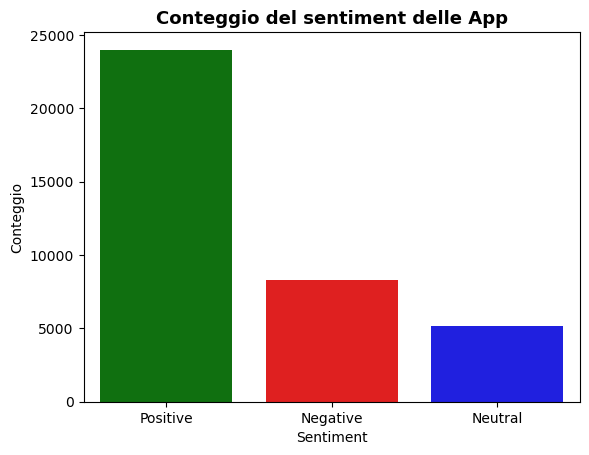

In [96]:
order_Sentiment = df2_clean['Sentiment'].value_counts().index

palette = {'Positive': 'green','Negative': 'red', 'Neutral': 'blue'}

sns.countplot(data=df2_clean ,x='Sentiment' , palette=palette, order= order_Sentiment)
plt.xlabel('Sentiment')
plt.ylabel('Conteggio')
plt.title('Conteggio del sentiment delle App', fontsize = 13, fontweight = '900')

plt.show()

Prima abbiamo visto come la distribuzione del "Sentiment Polarity" avesse un picco su X=0 (Neutral) ed è effettivamente cosi, poco più di 5 mila reviews neutre. Ovviamente in questo grafico dobbiamo prendere in considerazione che le altre due categorie, Positive e Negative, sono la somma di tutte le reviews prese nell'intervallo in questione, Positive per X>0, Negative X<0.

Vediamo come ci sono più valori positivi che negativi questo vuol dire che la maggior parte delle App viene apprezzatta dal segmento di mercato a cui si riferiscono

Abbiamo solo due colonne con dati numerici in questo dataset, quindi vediamo se esiste qualche correlazione tra questi due dati " Sentiment_Polarity" e "Sentiment_Subjectivity"

<function matplotlib.pyplot.show(close=None, block=None)>

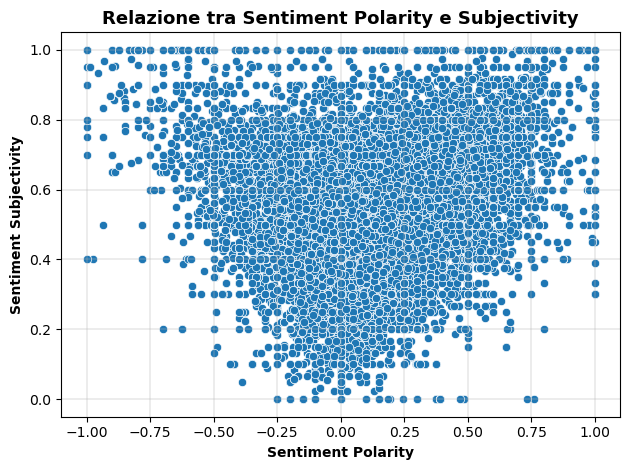

In [97]:
sns.scatterplot(data=df2_clean,x='Sentiment_Polarity',y='Sentiment_Subjectivity')
plt.xlabel('Sentiment Polarity', fontsize = 10, fontweight = '900', color = 'black')
plt.ylabel('Sentiment Subjectivity', fontsize = 10, fontweight = '900', color = 'black')
plt.title('Relazione tra Sentiment Polarity e Subjectivity', fontsize = 13, fontweight = '900', color = 'black')
plt.grid(linewidth = 0.33)
plt.tight_layout()
plt.show

Il grafico non è chiarissimo, vediamo se c'è una relazione tra le due variabili 

In [98]:
df2_clean['Sentiment_Polarity'].corr(df2_clean['Sentiment_Subjectivity'])

0.26158727977851337

C'è una leggera correlazione tra i due dati 

Esploriamola nel dettaglio con una regressione lineare

In [99]:
Polarity_sent = copy.deepcopy(df2_clean['Sentiment_Polarity'])
Subjectivity = copy.deepcopy(df2_clean['Sentiment_Subjectivity'])

In [100]:
X_test,X_train,y_test,y_train = model_selection.train_test_split(Polarity_sent,Subjectivity,train_size=0.8,random_state=0)

In [101]:
X_test = X_test.values.reshape(-1,1)
X_train = X_train.values.reshape(-1,1)

In [102]:
model = linear_model.LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [103]:
pred = model.predict(X_test)

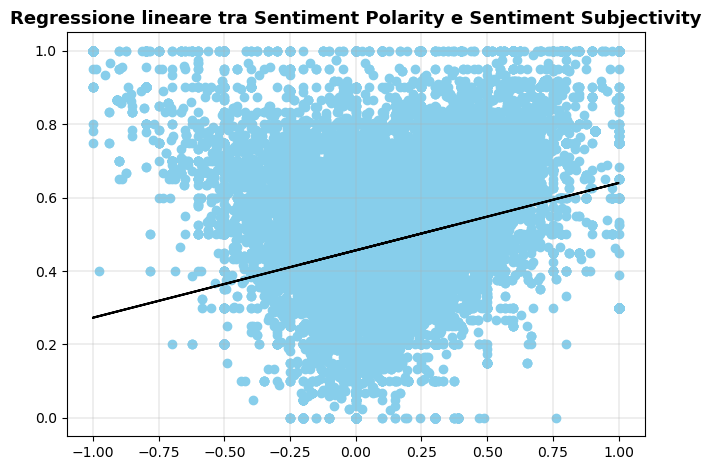

In [104]:
plt.scatter( X_test,y_test, color = 'skyblue')
plt.plot(X_test ,pred ,color='black' ) #training line
plt.title('Regressione lineare tra Sentiment Polarity e Sentiment Subjectivity', fontsize = 13, fontweight = '900')
plt.grid(True, linewidth = 0.3)
plt.tight_layout()
plt.show()

In [105]:
score = model.score(X_train,y_train)
print('Model determination:',score)

Model determination: 0.06146712042367519


Il modello che visualizziamo ha uno score troppo basso per essere usato per fare delle ipotesi 

Di conseguenza andiamo a cercare dei cluster, ovvero grupopi di applicazioni Applicazioni che hanno comportamenti simili

Usiamo il "Elbow method" per determinare il numero di cluster ottimale

In [106]:
k_rng = range (1,10)
sse = []

for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df2_clean[['Sentiment_Polarity','Sentiment_Subjectivity']])
    sse.append(km.inertia_)

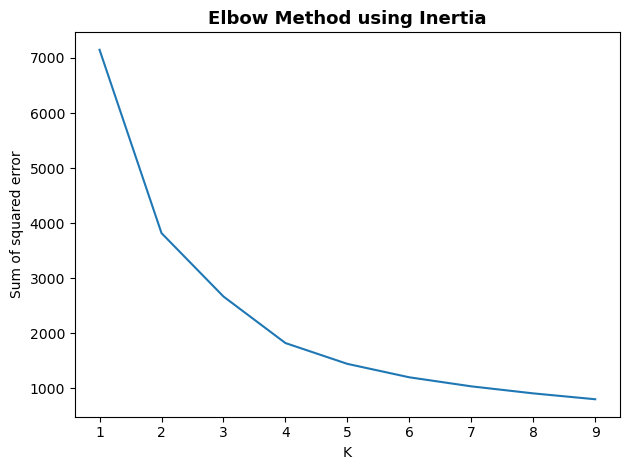

In [107]:
plt.plot(k_rng,sse)
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.title('Elbow Method using Inertia', fontsize = 13, fontweight = '900')
plt.tight_layout()
plt.show()

Dal grafico deduciamo che il numero di cluster più efficente è 4. Detto ciò partiamo con la clusterizzazione e visualizziamo i risultati con uno scatterplot.

In [108]:
kmeans = KMeans(n_clusters=4)

cluster = kmeans.fit_predict(df2_clean[['Sentiment_Polarity','Sentiment_Subjectivity']])
df2_clean['cluster'] = cluster

centroids_3 = kmeans.cluster_centers_

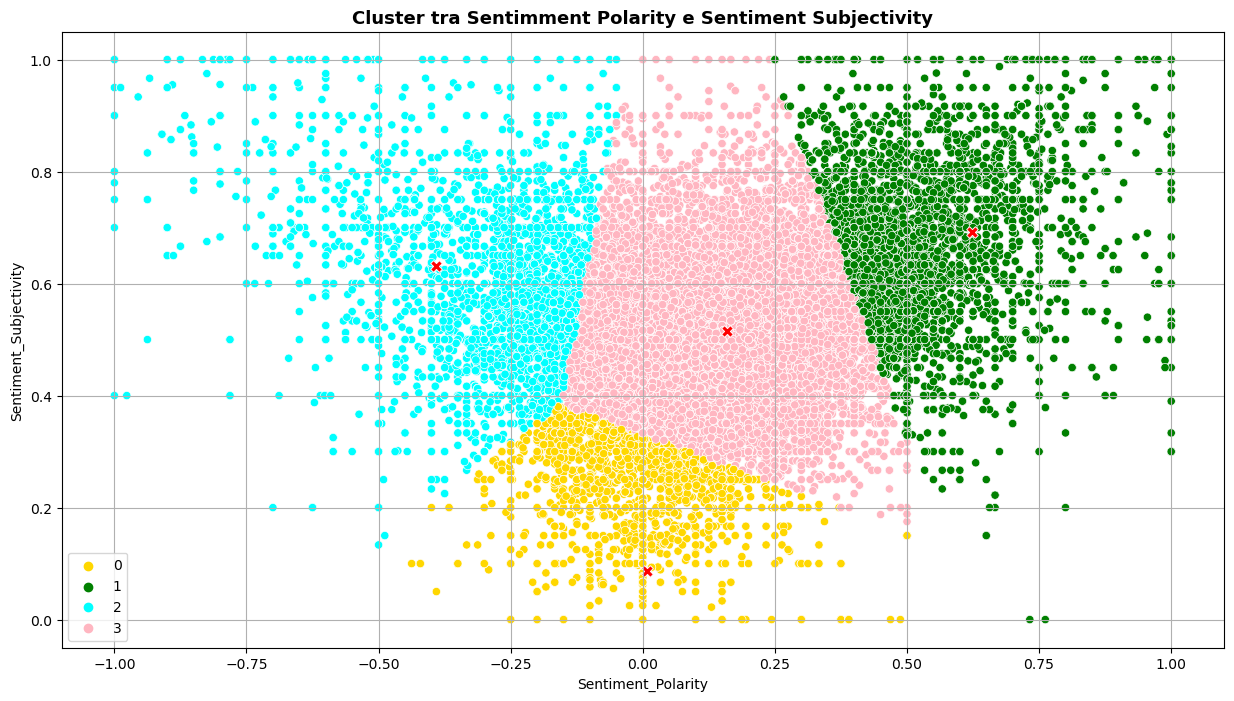

In [109]:
plt.figure(figsize=(15,8))

custom_palette = ['gold', 'green','cyan','lightpink']
sns.scatterplot(x='Sentiment_Polarity',y='Sentiment_Subjectivity',data=df2_clean,hue='cluster',palette = custom_palette)
sns.scatterplot(x= centroids_3[:,0],y=centroids_3[:,1],marker = 'X', s=70, color ='red') 
plt.title('Cluster tra Sentimment Polarity e Sentiment Subjectivity', fontsize = 13, fontweight = '900')
plt.grid(True)
plt.show()

In questo grafico vediamo che l'area Viola, sia spostata leggermente in alto e leggermente verso sinistra quindi presumiamo che un'App che ha Polarità <-0.2, molte volte ha anche Subjectivity > 0.4.
- Sono le App con interesse negativo

La regione Blu ci dice che che le App con Subjectivity >0.3 e Polarity >0,
- Sono App con interesse neutro o in alcuni casi positivo.

La regione Verde ci dice che molte volte, un'App con alta Polarità, ha anche una subjectivity alta, per cui deduciamo che, applicazioni con queste caratteristiche siano molto apprezzate dal pubblico.
- Sono le App con maggior interesse

La regione Rossa, che si posiziona approssimativamente nel mezzo e spostata in basso, ci dice che le App in questo cluster sono neutre dal lato utente, infatti la maggior parte dei feedback ha valori neutri o bassi 
- Sono le App con interesse neutro o negativo

Conclusioni:
- Abbiamo visto che le tre Categorie con più App sono "Family","Game","Tools", sono anche le categorie con più concorrenza.

- Abbiamo visto che le tre Categorie con maggior interersse sono "Game","Coomunication" e "Tools".

- Abbiamo visto che le App con Rating = 0 sono le più sconosciute tra utenti, probabilmente per una pubblicià sbagliata da parte delle aziende

- Abbiamo visto che c'è una buona correlazione tra le App che hanno tante Installazioni e tante Reviews, questo ci fa capire se una App piace o meno

- Abbiamo visto che in generale, nello store, le App con recensione positive sono maggiori rispetto al numero di App con recensioni negative



Approfondisco velocemente la Categoria "TOOLS" perchè è un mercato in cui lancerei la mia App.

In [110]:
df_filt = copy.deepcopy(df1[df1['Category']=='TOOLS'])

In [111]:
df_filt['Content Rating'].value_counts()

Content Rating
Everyone      819
Teen            5
Mature 17+      2
Unrated         1
Name: count, dtype: int64

Molte App sono per utenti di tutte le età quindi il bacino di utenza è molto ampio

In [112]:
df_filt.describe()

,Rating,Reviews,Installs
count,827.0,8.270000e+02,8.270000e+02
mean,3.97384,2.773356e+05,9.675661e+06
std,0.602035,2.047973e+06,5.456697e+07
min,1.0,0.000000e+00,1.000000e+00
25%,3.540973,2.700000e+01,1.000000e+03
50%,4.1,4.780000e+02,5.000000e+04
75%,4.4,1.916500e+04,1.000000e+06
max,5.0,4.291653e+07,1.000000e+09


Il Rating medio è piuttosto alto

Vediamo la distribuzione del Rating e cerchiamo Outliers

In [113]:
media_filt = df_filt['Rating'].mean()

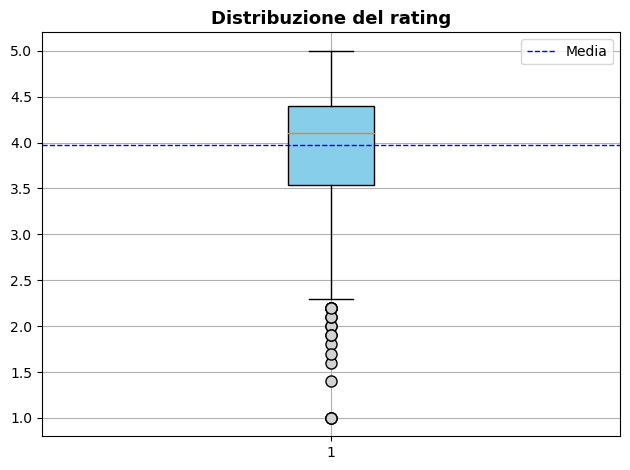

In [114]:
flierprops = dict(marker = 'o', markersize = 8, markerfacecolor = 'lightgrey', markeredgecolor = 'Black')
plt.boxplot(df_filt['Rating'], flierprops= flierprops,patch_artist=True, boxprops={'facecolor' : 'skyblue'})

plt.axhline(media_filt,color = 'b',linestyle = '--',linewidth = 1, label = 'Media')
plt.grid(True)
plt.title('Distribuzione del rating', fontsize = 13, fontweight = '900', color = 'black')
plt.legend()
plt.tight_layout()
plt.show()

Vediamo che la maggior parte dei dati si concentra con Rating > 3.5 e che ci sono degli putliers inferiori, infatti mediana(linea arancione) e media(linea blu) non combaciano

Adesso vediamo la distribuzione del prezzo delle App

In [115]:
order_price = df_filt['Price'].value_counts().index
order_price= order_price.sort_values(ascending=True)

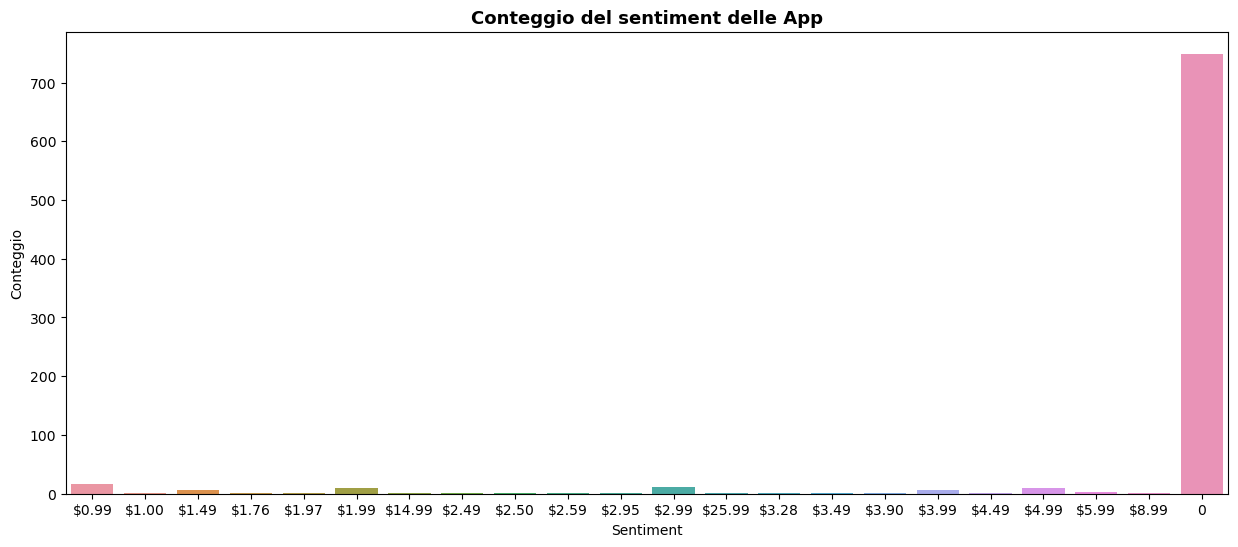

In [116]:
plt.figure(figsize=(15,6))
sns.countplot(data=df_filt ,x='Price', order= order_price)
plt.xlabel('Sentiment')
plt.ylabel('Conteggio')
plt.title('Conteggio del sentiment delle App', fontsize = 13, fontweight = '900')
plt.show()

Moltissime App sono gratis quindi conviene valutare attentamente se mettere gratis la mia App

In [117]:
Tools_time_serie = copy.deepcopy(df_filt)

Tools_time_serie['Last Updated'] = pd.to_datetime(Tools_time_serie['Last Updated'], format= '%B %d, %Y')
Tools_time_serie.set_index('Last Updated',inplace=True)

In [118]:
mediaRevMonth_tools = Tools_time_serie.resample('Q').mean(numeric_only=True)/1000

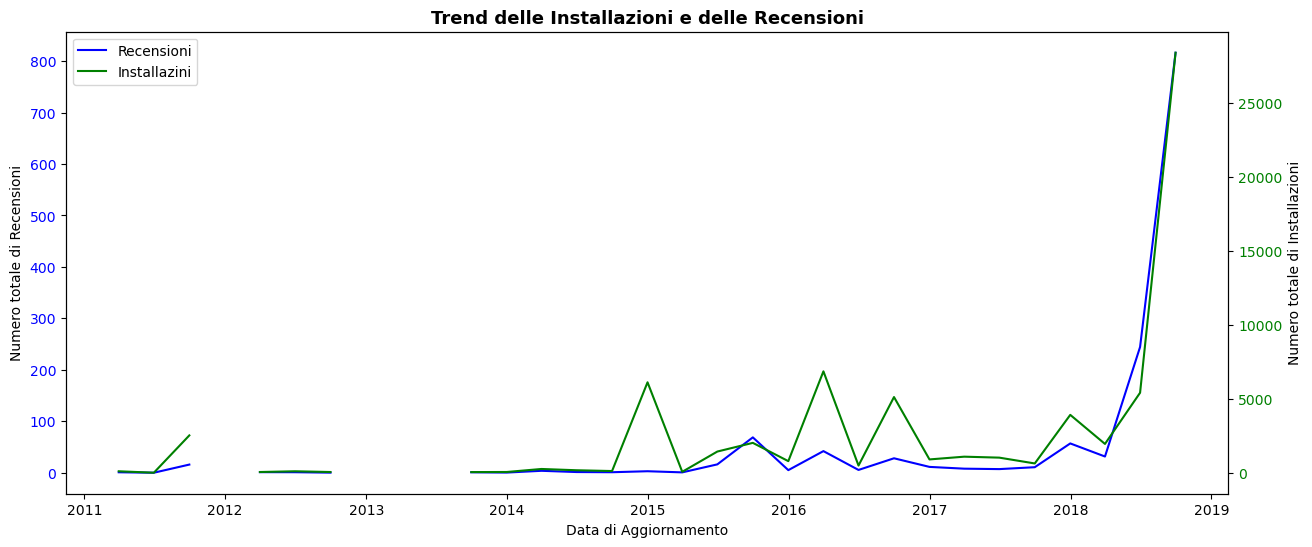

In [119]:
fig, ax1 = plt.subplots(figsize=(15,6))
ax2 = ax1.twinx()

ax1.plot(mediaRevMonth_tools.index,mediaRevMonth_tools['Reviews'], color = 'b', label = 'Recensioni')
ax1.set_xlabel('Data di Aggiornamento')
ax1.set_ylabel('Numero totale di Recensioni')
ax1.tick_params(axis='y', labelcolor = 'b')

ax2.plot(mediaRevMonth_tools.index,mediaRevMonth_tools['Installs'], color = 'g', label = 'Installazini')
ax2.set_ylabel('Numero totale di Installazioni')
ax2.tick_params(axis='y', labelcolor = 'g')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

plt.title('Trend delle Installazioni e delle Recensioni', fontsize = 13, fontweight = '900')

plt.show()

per molto tempo poche persone usavano le app di tools

In [120]:
datacorr_ToolS = Tools_time_serie['Installs'].corr(Tools_time_serie['Reviews'])
print("Correlazione tra Numero totale di installazioni e Numero totale di Installazioni:",datacorr_ToolS)

Correlazione tra Numero totale di installazioni e Numero totale di Installazioni: 0.6262977635858804


vediamo che la correlazione è molto simile a quella che abbiamo fatto per il DF principale.
Continuiamo con una regressione lineare per trarre le conclusioni per la nostra strategia.

In [121]:
Install_tools = copy.deepcopy(df_filt['Installs'])
Reviews_tools = copy.deepcopy(df_filt['Reviews'])

In [122]:
X_test,X_train,y_test,y_train = model_selection.train_test_split(Install_tools,Reviews_tools,test_size=0.8,random_state=0)

In [123]:
X_test = X_test.values.reshape(-1,1)
X_train = X_train.values.reshape(-1,1)

In [124]:
model = linear_model.LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [125]:
pred = model.predict(X_test)

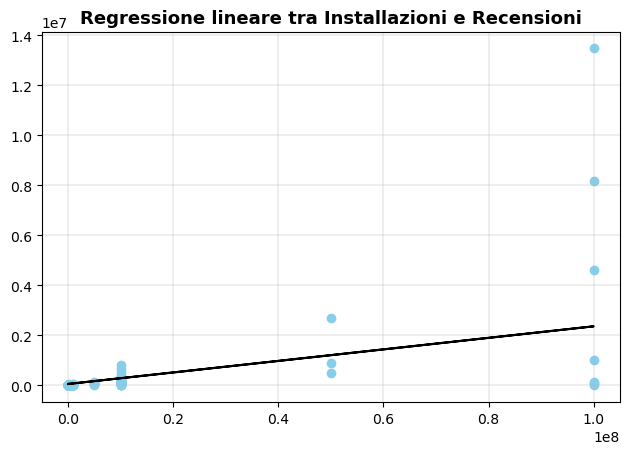

In [126]:
plt.scatter( X_test,y_test, color = 'skyblue')
plt.plot(X_test ,pred ,color='black' ) #training line
plt.title('Regressione lineare tra Installazioni e Recensioni', fontsize = 13, fontweight = '900')
plt.grid(True, linewidth = 0.3)
plt.tight_layout()
plt.show()

In [127]:
score = model.score(X_train,y_train)
print('Model determination:',score)

Model determination: 0.39787868857706143


Anche lo score di questo modello è molto simile allo score fatto per il modello del DF principale, il che è un'ottimo dato

Conclusioni:
- La categoria "TOOLS" ha buoni numeri in fatto di Installs e reviews

- La concorrenza è abbastanza notevole, considerando il fatto che molte App sono gratuite e che il bacino di utenza è molto ampio.

- Dopo il 2017 è un segmento di mercato in grande crescita, basti pensare a come è cambiato il mondo del lavoro dal 2018 ad oggi, ci sono molti più gestionali a disposizione delle aziende; inoltre negli ultimi tempi, molte aziende si sono spostate sullo smartworking per cui si ha la necessità di avere Tools per tenere d'occhio tutti i lavori dei dipendenti,per organizzare il lavoro per il TEAM, per non perdere file aziendali e di facilitare il lavoro tra i dipendenti che devono usare i file aziendali per lavorare

Detto ciò, 
vorrei fare un'app che permette di fare "to-do list", organizzare il lavoro con i colleghi e dove organizzare i propri file di lavoro, con la possibilità di integrare spazi di lavoro comuni in modo da avere tutto sotto controllo.
- la strutturerei a piani di abbonamento, questo mi permette di avere flusso di cassa per crescere e investire sullo sviluppo.

- con la possibilità di creare ad hoc un'abbonamento per ogni "Profilo Utente" , come Big Company, Small Company, Start-Up oppure Freelencer.